import dd
import numpy as np
import matplotlib.pyplot as plt
from getsig import getsig
from ddremoveELMData import *
plt.style.use('helvet2')

Edition 5: Phase I

Edition 3: Phase II

Edition 4: Phase III

Edition 6 is ruined?

In [2]:
shotnr = 30554
ped = dd.shotfile('PED', shotnr, experiment='guimas', edition=3)
t1 = ped('t1')
t2 = ped('t2')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [3]:
nedata = ped('neData')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [4]:
np.shape(nedata.area.data)

(1, 32768)

In [5]:
mskz = nedata.data!=0.0
rhos = nedata.area.data[0,mskz]
dens = nedata.data[mskz]

In [6]:
diagind = ped('DiagIndx')
nedpts = ped('neDPts')
indexesr = nedpts.data[nedpts.data!=0]
ped.close()
print(indexesr)

[  58.  371. 2480.]


In [7]:
#This still needs some automation
indi = np.array([0, indexesr[0], indexesr[0]+indexesr[1]]).astype(int)
indf = np.array([indexesr[0]-1, indexesr[0]+indexesr[1]-1, indexesr[0]+indexesr[1]+indexesr[2]-1]).astype(int)
zorder = np.array([3,2,1])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS']
clrs = ['r','g','b']

#### Get the average inter-ELM separatrix position

In [8]:
fpg = getsig(shotnr, 'FPG', 'Raus')
fpgmsk = ddremoveELMData(shotnr, fpg.time, preft=0.002, suft=0.004, elm_exper='guimas')
fpgind = (fpg.time>=t1.data)&(fpg.time<=t2.data)&fpgmsk
fpgavg = np.mean(fpg.data[fpgind])

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


#### Convert rho to Major Radius

In [9]:
import kk_abock
eq = kk_abock.kk()
eq.Open(30554, diag='FPP')
radius = eq.rhopol_to_Rz(3.0, rhos, 0.0)
rad = radius['R']
eq.Close()

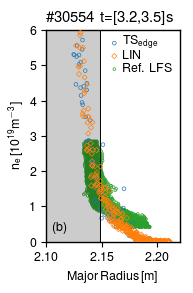

In [10]:
plt.figure(figsize=(2,3), dpi=100)
#for a,b,zord,d,clr in zip(indi, indf, zorder,labels,clrs):
#    plt.scatter(rad[np.int(a):np.int(b)],dens[np.int(a):np.int(b)]*1e-19,s=6,zorder=zord,label=d,c=clr)

dotsize = 7
dotsizeref = 4

plt.scatter(rad[indi[0]:indf[0]], dens[indi[0]:indf[0]]*1e-19, s=dotsize, zorder=2, label=labels[0],
            facecolors='none', edgecolors="C0", marker='o')
plt.scatter(rad[indi[1]:indf[1]], dens[indi[1]:indf[1]]*1e-19, s=dotsize, zorder=3, label=labels[1],
            facecolors='none', edgecolors="C1", marker='D')
            #facecolors='none', edgecolors="C{}".format(1), marker='D')

#Clean up ref
rrad = rad[indi[2]:indf[2]]
ddens = dens[indi[2]:indf[2]]
nms = rrad>2.135
plt.scatter(rrad[nms]-0.0015, ddens[nms]*1e-19, s=dotsizeref, zorder=1, label=labels[2],
            facecolors='none', edgecolors="C2", marker='o')

plt.axvline(fpgavg, color='k', lw=0.7)
plt.axvspan(2.1, fpgavg, color='k', alpha=0.2)

plt.xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
plt.ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
plt.ylim(0,6)
plt.xlim(2.10,2.22)
plt.title('\#30554 t=[%0.1f,%0.1f]s'%(t1.data,t2.data), loc='left')
plt.legend(loc='upper right',borderpad=0.,frameon=False,handletextpad=-0.3,labelspacing=0)
plt.xticks([2.10,2.15,2.20])
plt.text(2.105,0.3,'(b)', color='k')
plt.tight_layout()
plt.savefig('Profiles/2_30554.png',dpi=300)
plt.show()

In [11]:
import pickle
refdata = {'r':rrad[nms]-0.0015, 'n':ddens[nms]*1e-19}
pickle.dump(refdata, open( "./Profiles/II_30554.pickle", "wb" ) )